In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Employment Data Analysis #

using the provided `Employment Data` for Boston neighborhoods

## District 4 ##

Not all of the neighborhood is in district 4, but we will use the entire neighborhood and intrapolate.

According to the District 4 Resource Guide from 2020, District 4 includes parts of 
- Dorchester, Mattapan, Roslindale, and Jamaica Plain.
- We are also assuming HydePark, FieldsCorner are neighborhoods part of District 4.

In [56]:
mattapan = pd.read_csv("Employment Data\MattapanSquareOTM.csv")
mattapan.rename(columns={"Unnamed: 1": "Mattapan"}, inplace=True)
mattapan.drop(columns={"Unnamed: 0"}, inplace=True)

roslindale = pd.read_csv("Employment Data\RoslindaleVillageOTM.csv")
roslindale.rename(columns={"Unnamed: 1": "Roslindale"}, inplace=True)
roslindale.drop(columns={"Unnamed: 0"}, inplace=True)

hydePark = pd.read_csv("Employment Data\HydeParkOTM.csv")
hydePark.rename(columns={"Unnamed: 1": "HydePark"}, inplace=True)
hydePark.drop(columns={"Unnamed: 0"}, inplace=True)

fieldsCorner = pd.read_csv("Employment Data\FieldsCornerOTM.csv")
fieldsCorner.rename(columns={"Unnamed: 1": "FieldsCorner"}, inplace=True)
fieldsCorner.drop(columns={"Unnamed: 0"}, inplace=True)

In [57]:
d4_neighborhoods_employment = mattapan.merge(roslindale, on='Work Area Profile Report')
d4_neighborhoods_employment = d4_neighborhoods_employment.merge(hydePark, on='Work Area Profile Report')
d4_neighborhoods_employment = d4_neighborhoods_employment.merge(fieldsCorner, on='Work Area Profile Report')

#sum up all the numbers
d4_neighborhoods_employment['D4_neighborhoods'] = d4_neighborhoods_employment[['Mattapan', 'Roslindale', 'HydePark', 'FieldsCorner']].sum(axis=1)

In [58]:
# save as CSV file
d4_neighborhoods_employment.to_csv("d4_neighborhoods_employment.csv")

In [59]:
d4_neighborhoods_employment

,Work Area Profile Report,Mattapan,Roslindale,HydePark,FieldsCorner,D4_neighborhoods
0,Total All Jobs,25,174,364,629,1192
1,Age 29 or younger,12,44,98,181,335
2,Age 30 to 54,6,82,174,298,560
3,Age 55 or older,7,48,92,150,297
4,"$1,250 per month or less",13,69,178,184,444
5,"$1,251 to $3,333 per month",10,75,103,273,461
6,"More than $3,333 per month",2,30,83,172,287
7,"Agriculture, Forestry, Fishing and Hunting",0,0,0,0,0
8,"Mining, Quarrying, and Oil and Gas Extraction",0,0,0,0,0
9,Utilities,0,0,0,0,0


### Racial and Ethnic Breakdown By Percentage of Employees in District 4 vs Other Neighborhoods ###

In [61]:
d4_emp_race = d4_neighborhoods_employment.loc[[27, 28, 29, 30, 31, 34], :]

d4_emp_race.set_index('Work Area Profile Report', inplace=True)
d4_emp_race

,Mattapan,Roslindale,HydePark,FieldsCorner,D4_neighborhoods
Work Area Profile Report,,,,,
White Alone,5,136,227,340,708
Black or African American Alone,17,23,102,143,285
American Indian or Alaska Native Alone,0,0,4,11,15
Asian Alone,0,12,21,127,160
Native Hawaiian or Other Pacific Islander Alone,0,0,0,2,2
Hispanic or Latino,5,32,63,133,233


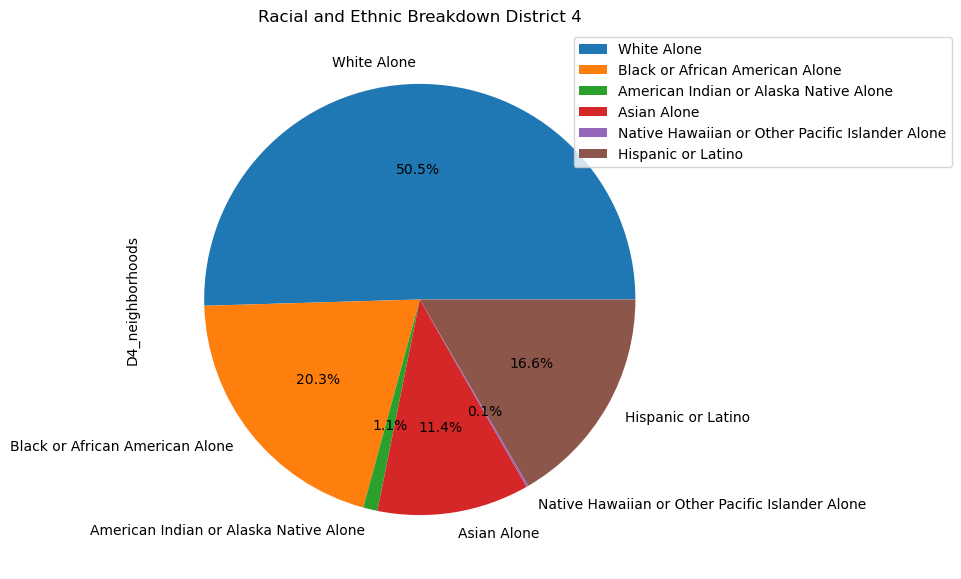

In [62]:
plot = d4_emp_race.plot.pie(y='D4_neighborhoods', title="Racial and Ethnic Breakdown District 4", figsize=(7, 7), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper right")

### Age Breakdown Percentage of Employees in District 4 Neighborhoods ### 

In [63]:
d4_emp_age = d4_neighborhoods_employment.loc[[1, 2, 3], :]

d4_emp_age.set_index('Work Area Profile Report', inplace=True)
d4_emp_age

,Mattapan,Roslindale,HydePark,FieldsCorner,D4_neighborhoods
Work Area Profile Report,,,,,
Age 29 or younger,12,44,98,181,335
Age 30 to 54,6,82,174,298,560
Age 55 or older,7,48,92,150,297


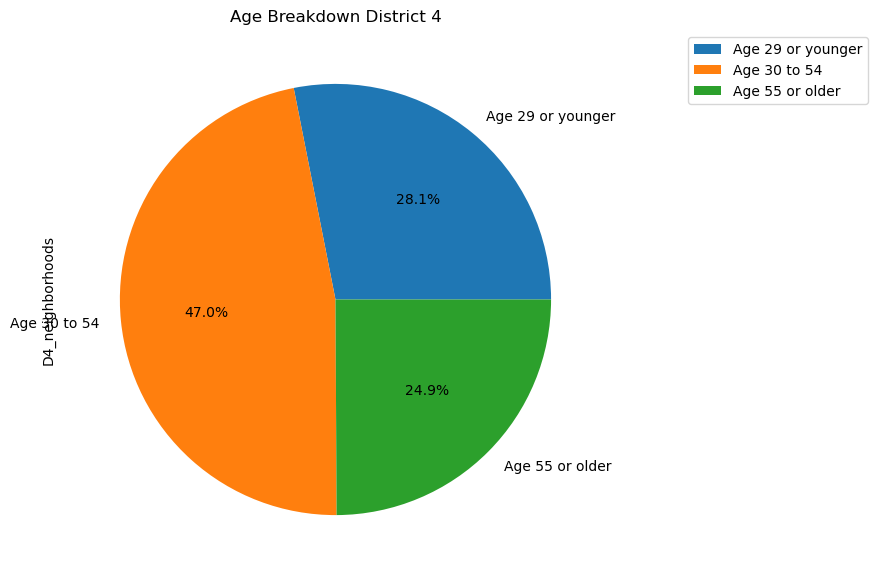

In [64]:
pie_age = d4_emp_age.plot.pie(y='D4_neighborhoods', title="Age Breakdown District 4", figsize=(7, 7), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper right")

### Educational Breakdown By Percentage of Employees in District 4 Neighborhoods ### 

In [65]:
d4_emp_edu = d4_neighborhoods_employment.loc[[35, 36, 37, 38, 39], :]

d4_emp_edu.set_index('Work Area Profile Report', inplace=True)
d4_emp_edu

,Mattapan,Roslindale,HydePark,FieldsCorner,D4_neighborhoods
Work Area Profile Report,,,,,
Less than high school,3,22,49,81,155
"High school or equivalent, no college",4,32,73,115,224
Some college or Associate degree,4,32,70,98,204
Bachelor's degree or advanced degree,2,44,74,154,274
Educational attainment not available (workers aged 29 or younger),12,44,98,181,335


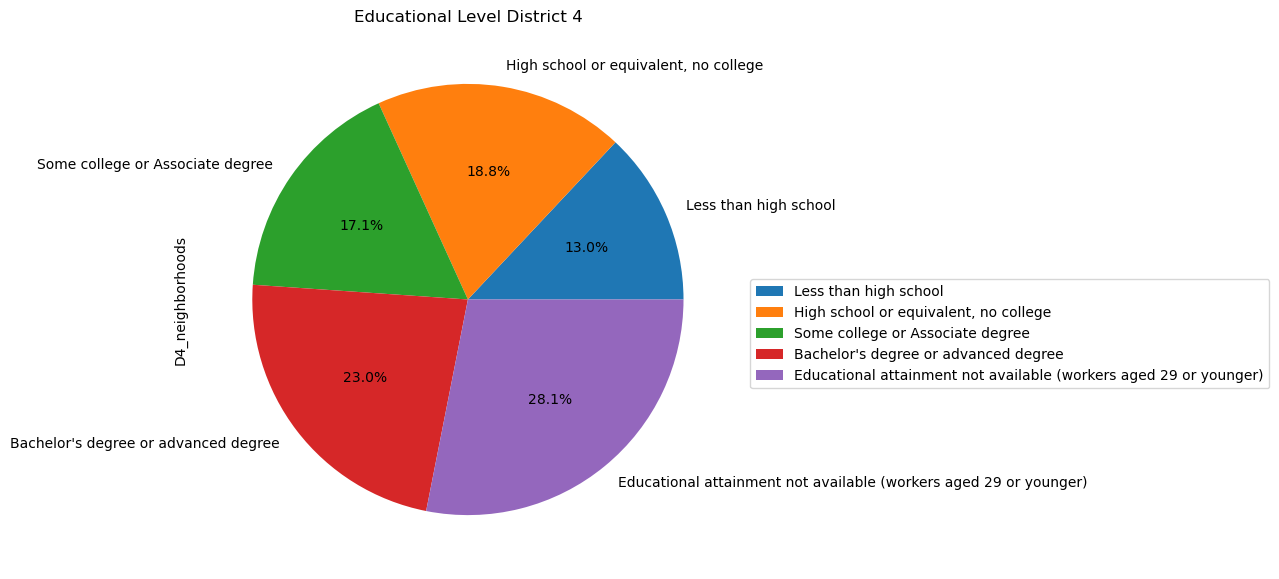

In [66]:
pie_edu = d4_emp_edu.plot.pie(y='D4_neighborhoods', title="Educational Level District 4", figsize=(7, 7), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(2, 0.55), loc="upper right")

### Gender Breakdown By Percentage of Employees in District 4 Neighborhoods ### 

In [67]:
d4_emp_gen = d4_neighborhoods_employment.loc[[40, 41], :]

d4_emp_gen.set_index('Work Area Profile Report', inplace=True)
d4_emp_gen

,Mattapan,Roslindale,HydePark,FieldsCorner,D4_neighborhoods
Work Area Profile Report,,,,,
Male,11,78,131,344,564
Female,14,96,233,285,628


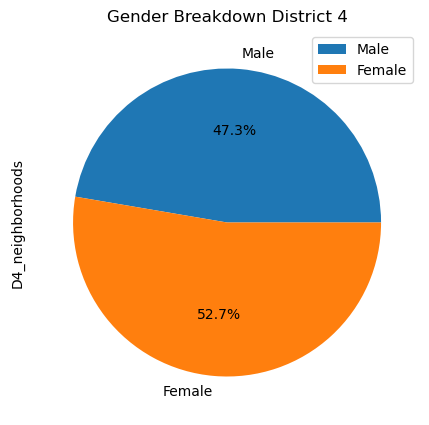

In [70]:
pie_gen = d4_emp_gen.plot.pie(y='D4_neighborhoods', title="Gender Breakdown District 4", figsize=(5, 5), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1), loc="upper right")

### Income Breakdown By Percentage of Employees in District 4 Neighborhoods ### 

In [71]:
d4_emp_income = d4_neighborhoods_employment.loc[[4, 5, 6], :]

d4_emp_income.set_index('Work Area Profile Report', inplace=True)
d4_emp_income

,Mattapan,Roslindale,HydePark,FieldsCorner,D4_neighborhoods
Work Area Profile Report,,,,,
"$1,250 per month or less",13,69,178,184,444
"$1,251 to $3,333 per month",10,75,103,273,461
"More than $3,333 per month",2,30,83,172,287


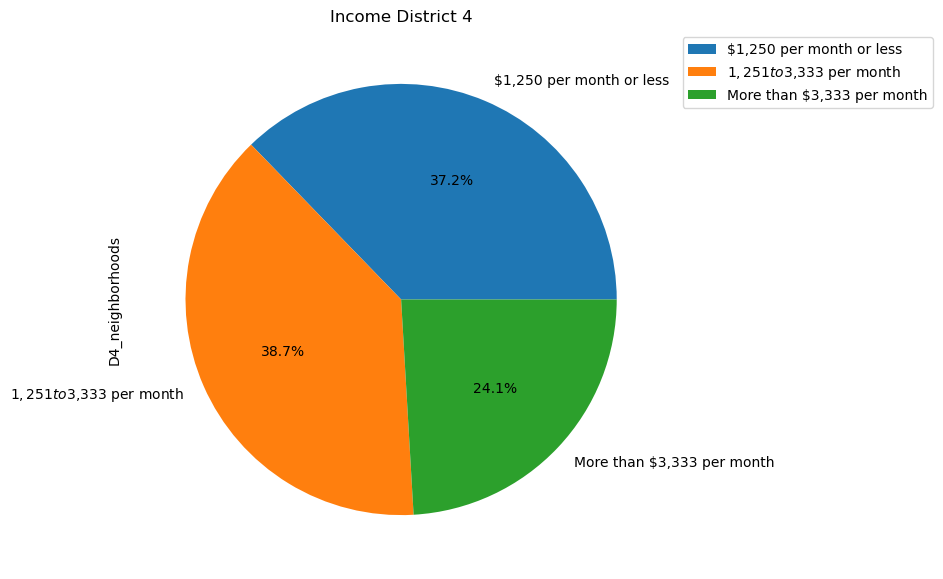

In [74]:
pie_income = d4_emp_income.plot.pie(y='D4_neighborhoods', title="Income District 4", figsize=(7, 7), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper right")

## Other Districts ##

compile all the other neighborhood data
Neighborhoods: 
- Allston, BowdoinGeneva, Brighton, Chinatown, EastBoston, EglestonSquare, FourCorners, 
- GreaterAshmont, GreaterGroveHall, JPCentreSouth, MissionHill, ThreeSquares, UphamsCorner, WashingtonStGateway
- Roxbury and West Roxbury

In [75]:
allston = pd.read_csv("Employment Data\AllstonOTM.csv")
allston.rename(columns={"Unnamed: 1": "Allston"}, inplace=True)
allston.drop(columns={"Unnamed: 0"}, inplace=True)

bowdoinGeneva = pd.read_csv("Employment Data\BowdoinGenevaOTM.csv")
bowdoinGeneva.rename(columns={"Unnamed: 1": "BowdoinGeneva"}, inplace=True)
bowdoinGeneva.drop(columns={"Unnamed: 0"}, inplace=True)

brighton = pd.read_csv("Employment Data\BrightonOTM.csv")
brighton.rename(columns={"Unnamed: 1": "Brighton"}, inplace=True)
brighton.drop(columns={"Unnamed: 0"}, inplace=True)

chinatown = pd.read_csv("Employment Data\ChinatownOTM.csv")
chinatown.rename(columns={"Unnamed: 1": "Chinatown"}, inplace=True)
chinatown.drop(columns={"Unnamed: 0"}, inplace=True)

eastBoston = pd.read_csv("Employment Data\EastBostonOTM.csv")
eastBoston.rename(columns={"Unnamed: 1": "EastBoston"}, inplace=True)
eastBoston.drop(columns={"Unnamed: 0"}, inplace=True)

egleston = pd.read_csv("Employment Data\EglestonSqOTM.csv")
egleston.rename(columns={"Unnamed: 1": "Egleston"}, inplace=True)
egleston.drop(columns={"Unnamed: 0"}, inplace=True)

fourCorners = pd.read_csv("Employment Data\FourCornersOTM.csv")
fourCorners.rename(columns={"Unnamed: 1": "FourCorners"}, inplace=True)
fourCorners.drop(columns={"Unnamed: 0"}, inplace=True)

greaterAshmont = pd.read_csv("Employment Data\GreaterAshmontOTM.csv")
greaterAshmont.rename(columns={"Unnamed: 1": "GreaterAshmont"}, inplace=True)
greaterAshmont.drop(columns={"Unnamed: 0"}, inplace=True)

greaterGroveHall = pd.read_csv("Employment Data\GreaterGroveHallOTM.csv")
greaterGroveHall.rename(columns={"Unnamed: 1": "GreaterGroveHall"}, inplace=True)
greaterGroveHall.drop(columns={"Unnamed: 0"}, inplace=True)

jpCentreSouth = pd.read_csv("Employment Data\JPCentreSouthOTM.csv")
jpCentreSouth.rename(columns={"Unnamed: 1": "JPCentreSouth"}, inplace=True)
jpCentreSouth.drop(columns={"Unnamed: 0"}, inplace=True)

missionHill = pd.read_csv("Employment Data\MissionHillOTM.csv")
missionHill.rename(columns={"Unnamed: 1": "MissionHill"}, inplace=True)
missionHill.drop(columns={"Unnamed: 0"}, inplace=True)

threeSquares = pd.read_csv("Employment Data\ThreeSquaresOTM.csv")
threeSquares.rename(columns={"Unnamed: 1": "ThreeSquares"}, inplace=True)
threeSquares.drop(columns={"Unnamed: 0"}, inplace=True)

uphamsCorner = pd.read_csv("Employment Data\\UphamsCornerOTM.csv")
uphamsCorner.rename(columns={"Unnamed: 1": "UphamsCorner"}, inplace=True)
uphamsCorner.drop(columns={"Unnamed: 0"}, inplace=True)

waStGateway = pd.read_csv("Employment Data\WashingtonStGatewayOTM.csv")
waStGateway.rename(columns={"Unnamed: 1": "WashingtonStGateway"}, inplace=True)
waStGateway.drop(columns={"Unnamed: 0"}, inplace=True)

roxbury = pd.read_csv("Employment Data\RoxburyOTM.csv")
roxbury.rename(columns={"Unnamed: 1": "Roxbury"}, inplace=True)
roxbury.drop(columns={"Unnamed: 0"}, inplace=True)

west_roxbury = pd.read_csv("Employment Data\WestRoxburyOTM.csv")
west_roxbury.rename(columns={"Unnamed: 1": "WestRoxbury"}, inplace=True)
west_roxbury.drop(columns={"Unnamed: 0"}, inplace=True)


In [76]:
#merge all the datasets
otherDistrict_employment = allston.merge(bowdoinGeneva, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(brighton, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(chinatown, on='Work Area Profile Report')
othereDistrict_employment = otherDistrict_employment.merge(eastBoston, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(egleston, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(fourCorners, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(greaterAshmont, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(greaterGroveHall, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(jpCentreSouth, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(missionHill, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(threeSquares, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(uphamsCorner, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(waStGateway, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(roxbury, on='Work Area Profile Report')
otherDistrict_employment = otherDistrict_employment.merge(west_roxbury, on='Work Area Profile Report')

#sum up all the numbers
col_list = list(otherDistrict_employment)
col_list.remove('Work Area Profile Report')
otherDistrict_employment['OtherDistricts'] = otherDistrict_employment[col_list].sum(axis=1)

In [77]:
otherDistrict_employment

,Work Area Profile Report,Allston,BowdoinGeneva,Brighton,Chinatown,Egleston,FourCorners,GreaterAshmont,GreaterGroveHall,JPCentreSouth,MissionHill,ThreeSquares,UphamsCorner,WashingtonStGateway,Roxbury,WestRoxbury,OtherDistricts
0,Total All Jobs,1040,284,2782,1540,151,87,93,330,96,21916,480,804,2104,12319,606,44632
1,Age 29 or younger,380,85,563,345,56,26,20,70,30,5299,158,150,494,1903,227,9806
2,Age 30 to 54,476,155,1446,844,59,50,57,184,52,12176,236,472,1123,7239,242,24811
3,Age 55 or older,184,44,773,351,36,11,16,76,14,4441,86,182,487,3177,137,10015
4,"$1,250 per month or less",314,73,367,595,59,34,40,83,30,2714,168,192,396,1322,225,6612
5,"$1,251 to $3,333 per month",440,80,561,483,48,41,33,151,41,3790,148,388,528,1403,190,8325
6,"More than $3,333 per month",286,131,1854,462,44,12,20,96,25,15412,164,224,1180,9594,191,29695
7,"Agriculture, Forestry, Fishing and Hunting",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Mining, Quarrying, and Oil and Gas Extraction",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Utilities,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
# save as CSV file
otherDistrict_employment.to_csv("otherDistrict_employment.csv")

### Racial and Ethnic Breakdown By Percentage of Employees ###

In [79]:
oth_emp_race = otherDistrict_employment.loc[[27, 28, 29, 30, 31, 34], :]
oth_emp_race.set_index('Work Area Profile Report', inplace=True)
oth_emp_race

,Allston,BowdoinGeneva,Brighton,Chinatown,Egleston,FourCorners,GreaterAshmont,GreaterGroveHall,JPCentreSouth,MissionHill,ThreeSquares,UphamsCorner,WashingtonStGateway,Roxbury,WestRoxbury,OtherDistricts
Work Area Profile Report,,,,,,,,,,,,,,,,
White Alone,656,151,1995,441,96,23,58,199,73,15214,370,379,1527,7608,485,29275
Black or African American Alone,190,106,450,20,33,51,15,97,8,3460,67,309,301,3730,74,8911
American Indian or Alaska Native Alone,9,1,10,0,0,1,0,2,2,110,8,11,7,72,1,234
Asian Alone,161,17,283,1066,17,7,19,24,12,2586,21,68,236,598,33,5148
Native Hawaiian or Other Pacific Islander Alone,2,3,8,1,0,1,0,0,0,46,2,13,5,21,1,103
Hispanic or Latino,168,57,296,35,24,12,11,137,14,2382,115,245,254,1762,64,5576


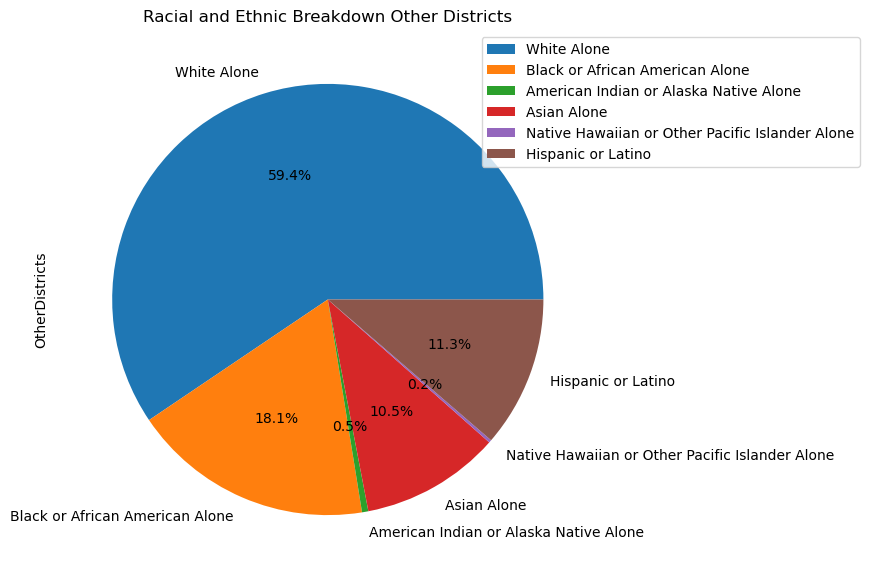

In [80]:
plot = oth_emp_race.plot.pie(y='OtherDistricts', title="Racial and Ethnic Breakdown Other Districts", figsize=(7, 7), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper right")

### Age Breakdown By Percentage of Employees in District 4 Neighborhoods ### 

In [81]:
oth_emp_age = otherDistrict_employment.loc[[1, 2, 3], :]

oth_emp_age.set_index('Work Area Profile Report', inplace=True)
oth_emp_age

,Allston,BowdoinGeneva,Brighton,Chinatown,Egleston,FourCorners,GreaterAshmont,GreaterGroveHall,JPCentreSouth,MissionHill,ThreeSquares,UphamsCorner,WashingtonStGateway,Roxbury,WestRoxbury,OtherDistricts
Work Area Profile Report,,,,,,,,,,,,,,,,
Age 29 or younger,380,85,563,345,56,26,20,70,30,5299,158,150,494,1903,227,9806
Age 30 to 54,476,155,1446,844,59,50,57,184,52,12176,236,472,1123,7239,242,24811
Age 55 or older,184,44,773,351,36,11,16,76,14,4441,86,182,487,3177,137,10015


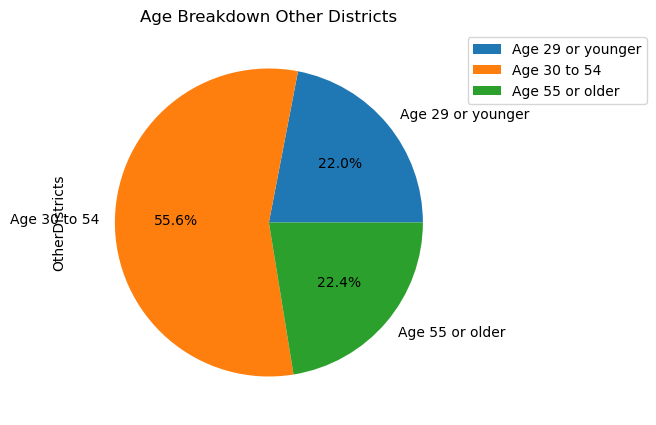

In [83]:
pie_oth_age = oth_emp_age.plot.pie(y='OtherDistricts', title="Age Breakdown Other Districts", figsize=(5, 5), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper right")

### Educational Breakdown By Percentage of Employees in District 4 Neighborhoods ###

In [84]:
oth_emp_edu = otherDistrict_employment.loc[[35, 36, 37, 38, 39], :]

oth_emp_edu.set_index('Work Area Profile Report', inplace=True)
oth_emp_edu

,Allston,BowdoinGeneva,Brighton,Chinatown,Egleston,FourCorners,GreaterAshmont,GreaterGroveHall,JPCentreSouth,MissionHill,ThreeSquares,UphamsCorner,WashingtonStGateway,Roxbury,WestRoxbury,OtherDistricts
Work Area Profile Report,,,,,,,,,,,,,,,,
Less than high school,116,39,249,231,14,13,13,71,11,1550,56,141,193,1114,39,3850
"High school or equivalent, no college",157,39,413,252,26,15,20,50,17,2715,64,144,314,1964,112,6302
Some college or Associate degree,189,59,629,232,26,16,22,78,14,4402,92,182,442,2835,106,9324
Bachelor's degree or advanced degree,198,62,928,480,29,17,18,61,24,7950,110,187,661,4503,122,15350
Educational attainment not available (workers aged 29 or younger),380,85,563,345,56,26,20,70,30,5299,158,150,494,1903,227,9806


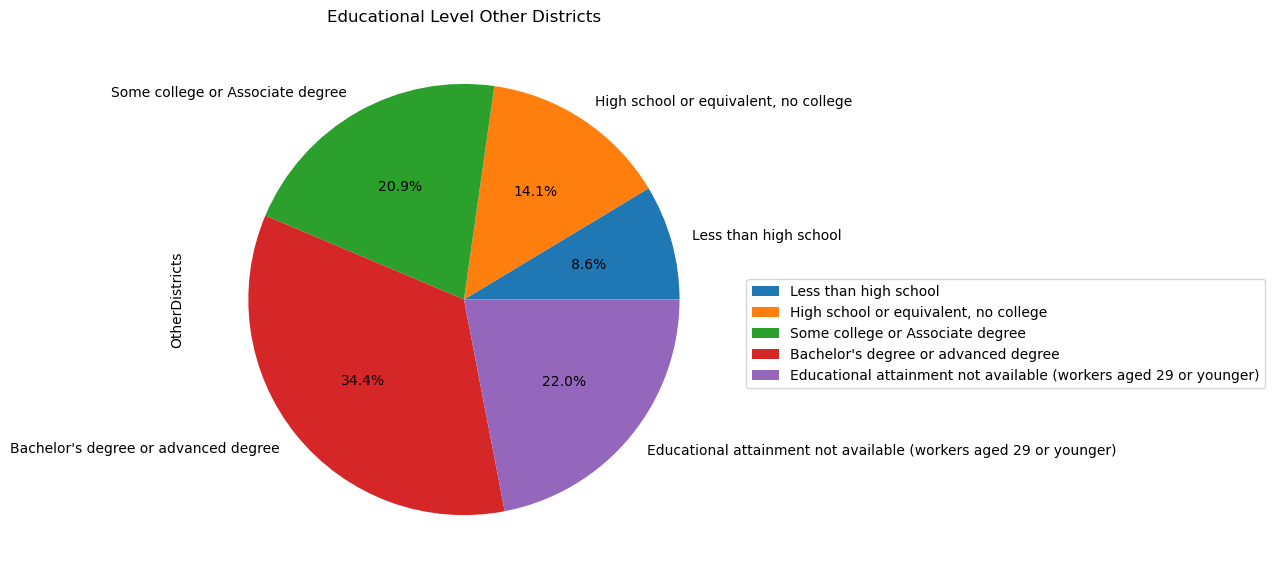

In [88]:
pie_oth_edu = oth_emp_edu.plot.pie(y='OtherDistricts', title="Educational Level Other Districts", figsize=(7, 7), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(2, 0.55), loc="upper right")

### Gender Breakdown By Percentage of Employees in District 4 Neighborhoods ### 

In [89]:
oth_emp_gen = otherDistrict_employment.loc[[40, 41], :]

oth_emp_gen.set_index('Work Area Profile Report', inplace=True)
oth_emp_gen

,Allston,BowdoinGeneva,Brighton,Chinatown,Egleston,FourCorners,GreaterAshmont,GreaterGroveHall,JPCentreSouth,MissionHill,ThreeSquares,UphamsCorner,WashingtonStGateway,Roxbury,WestRoxbury,OtherDistricts
Work Area Profile Report,,,,,,,,,,,,,,,,
Male,613,142,893,785,75,51,45,158,45,7865,226,235,904,5555,281,17873
Female,427,142,1889,755,76,36,48,172,51,14051,254,569,1200,6764,325,26759


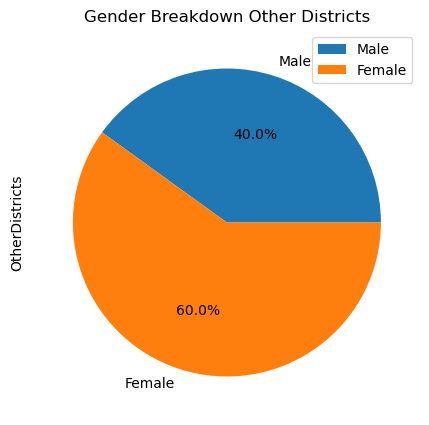

In [90]:
pie_oth_gen = oth_emp_gen.plot.pie(y='OtherDistricts', title="Gender Breakdown Other Districts", figsize=(5, 5), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1), loc="upper right")

### Income Breakdown By Percentage of Employees in District 4 Neighborhoods ### 

In [91]:
oth_emp_income = otherDistrict_employment.loc[[4, 5, 6], :]

oth_emp_income.set_index('Work Area Profile Report', inplace=True)
oth_emp_income

,Allston,BowdoinGeneva,Brighton,Chinatown,Egleston,FourCorners,GreaterAshmont,GreaterGroveHall,JPCentreSouth,MissionHill,ThreeSquares,UphamsCorner,WashingtonStGateway,Roxbury,WestRoxbury,OtherDistricts
Work Area Profile Report,,,,,,,,,,,,,,,,
"$1,250 per month or less",314,73,367,595,59,34,40,83,30,2714,168,192,396,1322,225,6612
"$1,251 to $3,333 per month",440,80,561,483,48,41,33,151,41,3790,148,388,528,1403,190,8325
"More than $3,333 per month",286,131,1854,462,44,12,20,96,25,15412,164,224,1180,9594,191,29695


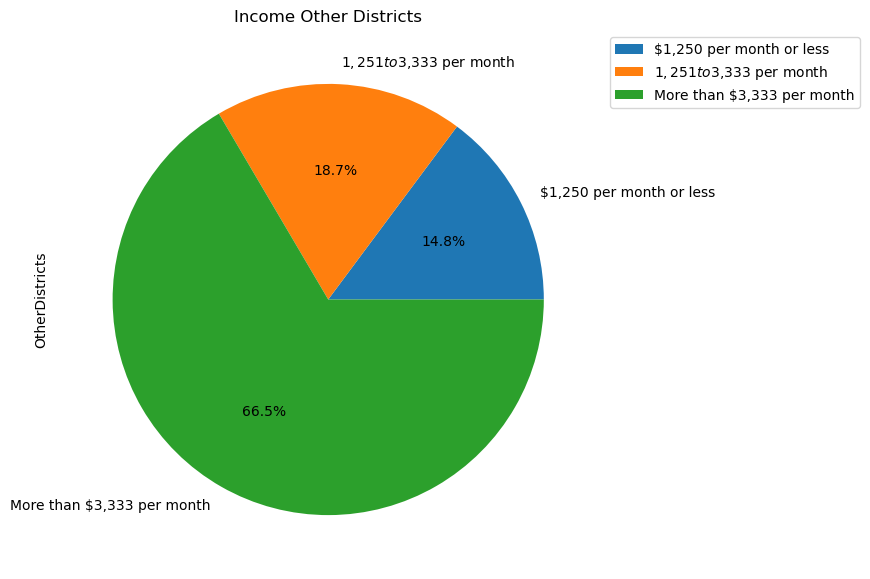

In [92]:
pie_oth_income =oth_emp_income.plot.pie(y='OtherDistricts', title="Income Other Districts", figsize=(7, 7), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper right")